## Práctica M 28

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from numpy import linalg as LA

In [18]:
df = pd.read_csv('C:/Users/Isaac/Desktop/IHD/EBAC DT/CIENCIA DE DATOS\M28 DS/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [19]:
df.set_index('variety', inplace = True)
df.head()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.1,3.5,1.4,0.2
Setosa,4.9,3.0,1.4,0.2
Setosa,4.7,3.2,1.3,0.2
Setosa,4.6,3.1,1.5,0.2
Setosa,5.0,3.6,1.4,0.2


In [20]:
index = df.index
renglones = len(index)
renglones

150

In [21]:
# estandarizamos las variables 

df2 = StandardScaler().fit_transform(df)
df2

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [22]:
# calculamos la matriz de correlacion para la matriz transformada
A = (1/renglones) * np.dot(df.T, df2)
A

array([[ 0.82530129, -0.09703049,  0.71945952,  0.67504787],
       [-0.0510736 ,  0.43441097, -0.18611908, -0.15904912],
       [ 1.53376714, -0.75379926,  1.75940407,  1.69406935],
       [ 0.62138384, -0.27814317,  0.73148177,  0.75969263]])

In [24]:
# entrenamos el modelo PCA con escalacdo de datos

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df)

modelo_pca = pca_pipe.named_steps['pca']

print('Eigenvalores')
results = LA.eigvals(A)
results

Eigenvalores


array([3.19944857, 0.44280359, 0.11208376, 0.02447304])

In [25]:
# porcentaje de varianza explicada por cada nuevo componente

print('Porcentaje de varianza explicada por cada nuevo componente')
print(modelo_pca.explained_variance_ratio_)

Porcentaje de varianza explicada por cada nuevo componente
[0.72962445 0.22850762 0.03668922 0.00517871]


In [27]:
# calculo de eigenvectores

print('Eigenvectores (por renglon)')
pd.DataFrame(data = modelo_pca.components_,
             columns =  df.columns,
             index = ['PC1','PC2','PC3','PC4'])

Eigenvectores (por renglon)


,sepal.length,sepal.width,petal.length,petal.width
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942
PC3,-0.719566,0.244382,0.142126,0.634273
PC4,-0.261286,0.123510,0.801449,-0.523597


In [29]:
# proyecciones de los componentes

proyec = np.dot(modelo_pca.components_, df2.T)
proyec = pd.DataFrame(proyec, index = ['PC1','PC2','PC3','PC4'])
proyec = proyec.transpose().set_index(df.index)
proyec

,PC1,PC2,PC3,PC4
variety,,,,
Setosa,-2.264703,0.480027,-0.127706,-0.024168
Setosa,-2.080961,-0.674134,-0.234609,-0.103007
Setosa,-2.364229,-0.341908,0.044201,-0.028377
Setosa,-2.299384,-0.597395,0.091290,0.065956
Setosa,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
Virginica,1.870503,0.386966,0.256274,-0.389257
Virginica,1.564580,-0.896687,-0.026371,-0.220192
Virginica,1.521170,0.269069,0.180178,-0.119171


<Figure size 640x480 with 0 Axes>

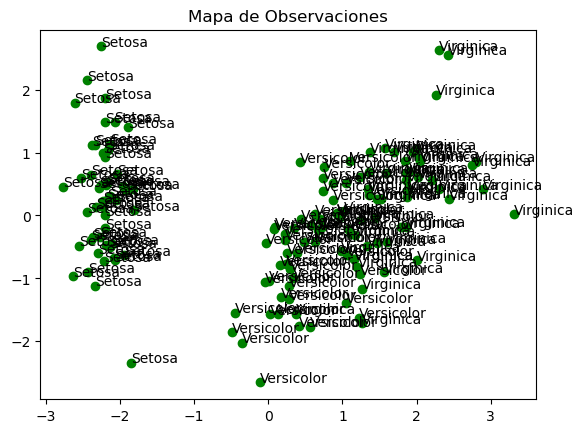

In [36]:
x = proyec.iloc[:,0]
y = proyec.iloc[:,1]
z = df.index

# convertimos x y y en un arreglo para poder graficar

x = x.to_numpy()
y = y.to_numpy()

# graficamos

plt.figure(dpi = 100)
fig, ax = plt.subplots()
ax.set_title('Mapa de Observaciones')
ax.scatter(x, y, c = 'green')

# agregamos etiquetas a cada punto

for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]))
    

In [43]:
componentes2 = pd.DataFrame(data = modelo_pca.components_,
                           columns = df.columns,
                           index = ['PC1','PC2','PC3','PC4'])
componentes2

,sepal.length,sepal.width,petal.length,petal.width
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942
PC3,-0.719566,0.244382,0.142126,0.634273
PC4,-0.261286,0.123510,0.801449,-0.523597


In [44]:
# mostramos solo los 2 primeros renglones con todas las columnas

componentes2 = componentes2.iloc[0:2, :]
componentes2

,sepal.length,sepal.width,petal.length,petal.width
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942


In [45]:
componentes2 = componentes2.T
componentes2

,PC1,PC2
sepal.length,0.521066,0.377418
sepal.width,-0.269347,0.923296
petal.length,0.580413,0.024492
petal.width,0.564857,0.066942


<Figure size 640x480 with 0 Axes>

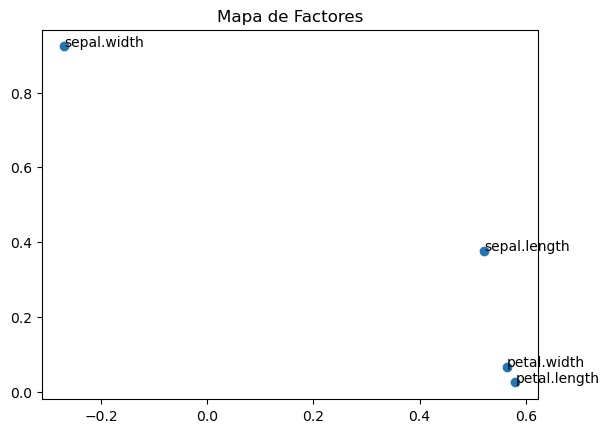

In [46]:
# graficamos componentes2

x = componentes2.iloc[:,0]
y = componentes2.iloc[:,1]
z = componentes2.index

# convertimos x y y en un arreglo para poder graficar

x = x.to_numpy()
y = y.to_numpy()

# graficamos

plt.figure(dpi = 100)
fig, ax = plt.subplots()
ax.set_title('Mapa de Factores')
ax.scatter(x, y,)

# agregamos etiquetas a cada punto

for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]))

In [47]:
# procedimineto para obtener la matriz estandarizada original

original = np.dot(modelo_pca.components_.T, proyec.T)
original = original.T
original

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      